In [1]:
## MP 573 Lecture 12: DFT in Multiple Dimensions
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
import scipy.linalg as lin

font = {'weight' : 'normal',
        'size'   : 20}

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

## Definition of the ND DFT

The DFT of an array in N dimensions, each with $M$ elements $f[m_0, m_1,...,m_{N-1}]$ is defined as:

$$\hat{f}[k_0,\ldots,k_{N-1}] = \sum_{m_0=0}^{M-1} \cdots \sum_{m_{N-1}=0}^{M-1}  f[m_0, m_1,...,m_{N-1}] e^{-i 2 \pi \frac{m_0 k_0 + \cdots + m_{N-1} k_{N-1}}{M}}$$

with N-D inverse DFT (iDFT) given by:
$$f[m_0,\ldots,m_{N-1}] = \frac{1}{M^N} \sum_{k_0=0}^{M-1} \cdots \sum_{k_{N-1}=0}^{M-1}  \hat{f}[k_0, k_1,...,k_{N-1}] e^{i 2 \pi \frac{m_0 k_0 + \cdots + m_{N-1} k_{N-1}}{M}}$$



## The 2D DFT

Note that the extension to arrays with different numbers of elements along different dimensions is straightforward. 
Also, the specific case of two-dimensional DFT for an $M \times M$ array is given by:

$$\hat{f}[k_0,k_1] =  \sum_{m_0=0}^{M-1} \sum_{m_1=0}^{M-1}  f[m_0, m_1] e^{-i 2 \pi \frac{m_0 k_0  + m_{1} k_{1}}{M}}$$

with 2D iDFT:

$$f[m_0,m_1] = \frac{1}{M^2} \sum_{k_0=0}^{M-1} \sum_{k_1=0}^{M-1}  \hat{f}[k_0, k_1] e^{i 2 \pi \frac{m_0 k_0  + m_{1} k_{1}}{M}}$$

## Start with a 4x4 example (M=4)


In [2]:
M=4
f = np.ones((M,M))
fhat = np.zeros((M,M)) + 1j*np.zeros((M,M)) # Initialize fhat

# Calculate fhat directly using the definition above
for k0 in range(M):
    for k1 in range(M):
        for m0 in range(M):
            for m1 in range(M):
                fhat[k0,k1] = fhat[k0,k1] + f[m0,m1]*np.exp(1j*2*np.pi*(m0*k0 + m1*k1)/M)
                
    
# Calculate fhat using function fftn
fhat2 = np.fft.fftn(f)

print('Using a loop, fhat = ')
print(fhat)

print('\n Using function fftn, fhat2 = ')
print(fhat2)

Using a loop, fhat = 
[[16.+0.j -0.+0.j  0.+0.j  0.+0.j]
 [-0.+0.j -0.+0.j  0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j  0.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j -0.+0.j -0.-0.j]]

 Using function fftn, fhat2 = 
[[16.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j]]


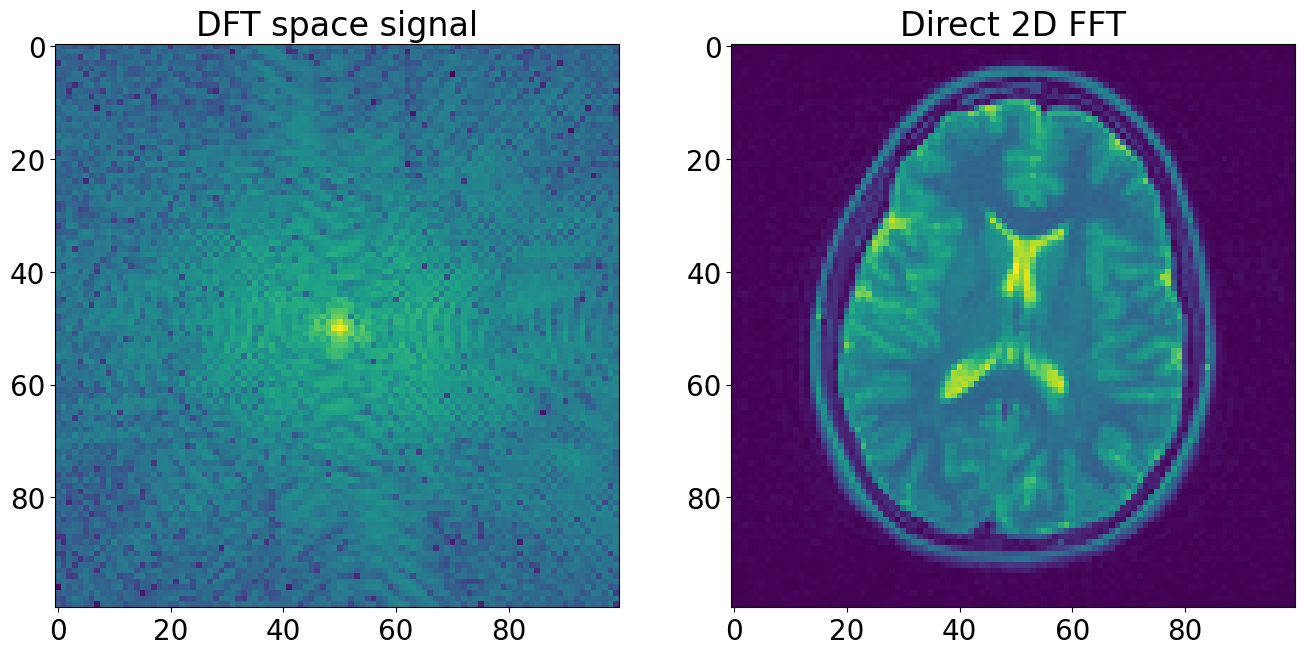

In [3]:
# If data are not here, copy over
import os.path
check_file = os.path.isfile('data/brain_fourier.mat')
if check_file == False:
  !wget https://github.com/dherarr/mp573/raw/master/data/brain_fourier.mat?raw=true
  !mkdir data
  !mv brain_fourier.mat\?raw\=true data/brain_fourier.mat

# Load some Fourier space MRI data
data_dir = pjoin('.', 'data')
mat_fname = pjoin(data_dir, 'brain_fourier.mat')
mat_contents = sio.loadmat(mat_fname)
fhat = mat_contents['dataLR']

# Run 2D iFFT 
fa = np.fft.fftshift(np.fft.ifftn(np.fft.ifftshift(fhat)))

plt.figure(figsize=(16,8))
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.imshow(np.log(abs(fhat)));
plt.title('DFT space signal')
plt.subplot(1,2,2)
plt.imshow(abs(fa));
plt.title('Direct 2D FFT');

Text(0.5, 1.0, '1D iDFT along y')

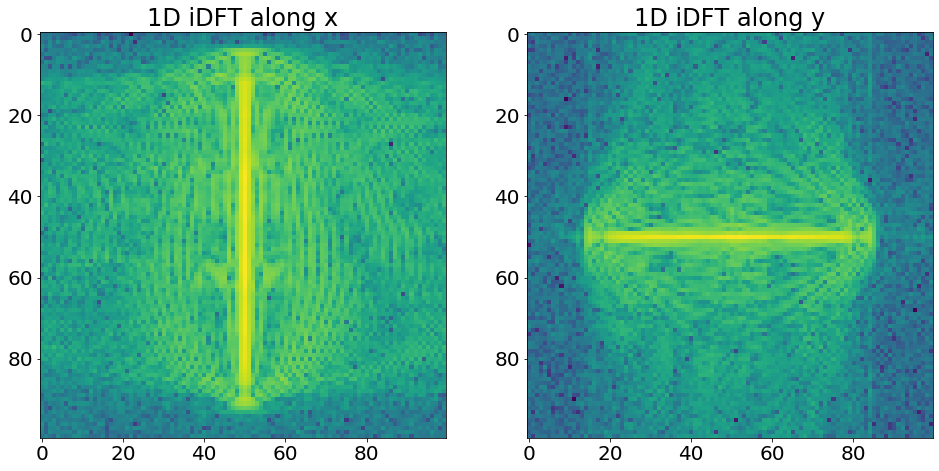

In [4]:
# Run iFFT only along x
fb1 = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(fhat,axes=0),axis=0),axes=0)

# Run iFFT only along y
fc1 = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(fhat,axes=1),axis=1),axes=1)

plt.figure(figsize=(16,8))
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.imshow(np.log(abs(fb1)));
plt.title('1D iDFT along x')
plt.subplot(1,2,2)
plt.imshow(np.log(abs(fc1)));
plt.title('1D iDFT along y')

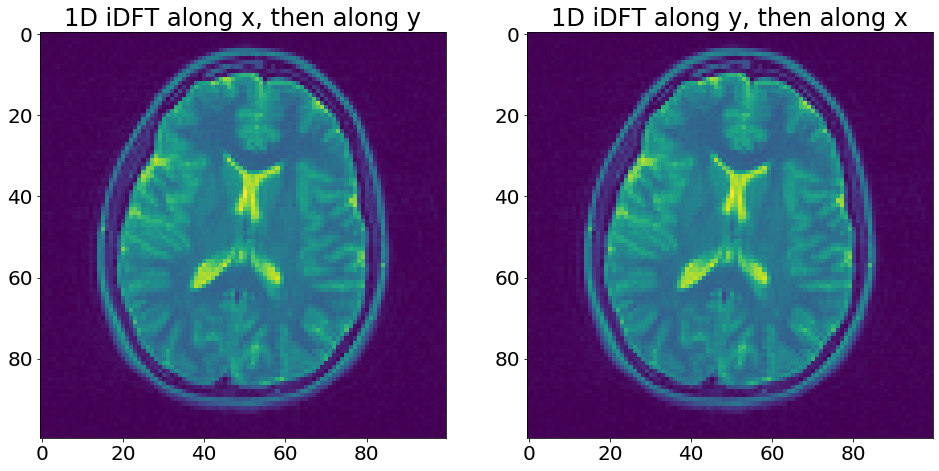

In [5]:
# Now let's run the DFT along the remaining dimension 
# Run iFFT only along x
fb = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(fb1,axes=1),axis=1),axes=1)

# Run iFFT only along y
fc = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(fc1,axes=0),axis=0),axes=0)

plt.figure(figsize=(16,8))
plt.rc('font', **font)
plt.subplot(1,2,1)
plt.imshow((abs(fb)));
plt.title('1D iDFT along x, then along y')
plt.subplot(1,2,2)
plt.imshow((abs(fc)));
plt.title('1D iDFT along y, then along x');

In [45]:
#Finally, let's check that our three versions of the reconstructed image are identical
diffb = np.linalg.norm(fa-fb)
diffc = np.linalg.norm(fa-fc)
print("Norm of the difference between fa and fb: = ", '{:f}'.format(diffb))
print("Norm of the difference between fa and fc: = ", '{:f}'.format(diffc))

Norm of the difference between fa and fb: =  0.000000
Norm of the difference between fa and fc: =  0.000000
